In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scikits.odes import ode
from matplotlib.ticker import FormatStrFormatter

In [3]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

In [4]:
from stochpy import SSA


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

## Stochastic model

In [5]:
def cmv(t, y, ydot):
    """Equatiosn from A Model for HCMV Infection in Immunosuppressed Patients."""
    ydot[0] = n*δ*y[2] - c*y[0] - f*k*y[3]*y[0] # V
    ydot[1] = (1-ϵ)*(μ*(1-y[1]/e)*y[1] + ρ*y[0]) # E
    ydot[2] = k*y[3]*y[0] - δ*y[2] - (1 - ϵ)*m*y[1]*y[2] + α*y[4] - κ*y[2] # I
    ydot[3] = λ*(1 - y[3]/r)*y[3] - k*y[3]*y[0] # S
    ydot[4] = λ*(1 - y[4]/s)*y[4] - α*y[4] + κ*y[2] # L    

In [6]:
%%file cmv.psc

# Reactions
V_birth:
    V > {2} V
    n*delta*I
E_birth:
    E > {2} E
    (1-epsilon)*mu*E + rho*V
I_birth:
    I > {2} I
    k*S*V + alpha*L
S_birth:
    S > {2} S
    lam*S
L_birth:
    L > {2} L
    lam*L + kappa*I
V_detah:
    V > $pool
    c*V + f*k*S*V
E_death:
    E > $pool
    0.5*(1-epsilon)*mu*E*(E-1)/e
I_death:
    I > $pool
    delta*I + (1-epsilon)*m*E*I + kappa*I
S_death:
    S > $pool
    0.5*lam*S*(S-1)/r + k*S*V
L_death:
    L > $pool
    0.5*lam*L*(L-1)/s + alpha*L
    
# Fixed species

# Variable species
V = 100
E = 0
I = 0
S = 400
L = 0

# Parameters
n = 5e1
delta = 2e-1
c = 3e-1
f = 1
k = 1e-4
epsilon = 0
mu = 4e-2
lam = 1e-3
e = 9
rho = 5
m = 1e-1
alpha = 2e-1
kappa =2e-3
r = 4e2
s = 4e-2

Overwriting cmv.psc


In [7]:
smod = SSA()

In [8]:
n_traj = 10
T = 90
smod.Model("cmv.psc", dir=".")
try:
    smod.DoStochSim(mode="time", end=T, trajectories=n_traj)
except:
    pass

tss = []
vss = []
ess = []
iss = []
sss = []
lss = []

for k in range(n_traj):
    smod.GetTrajectoryData(k+1)
    t_s, v_s, e_s, i_s, s_s, l_s = smod.data_stochsim.getSpecies().T
    tss.append(t_s)
    vss.append(v_s)
    ess.append(e_s)
    iss.append(i_s)
    sss.append(s_s)
    lss.append(l_s)

Adding \n to input file


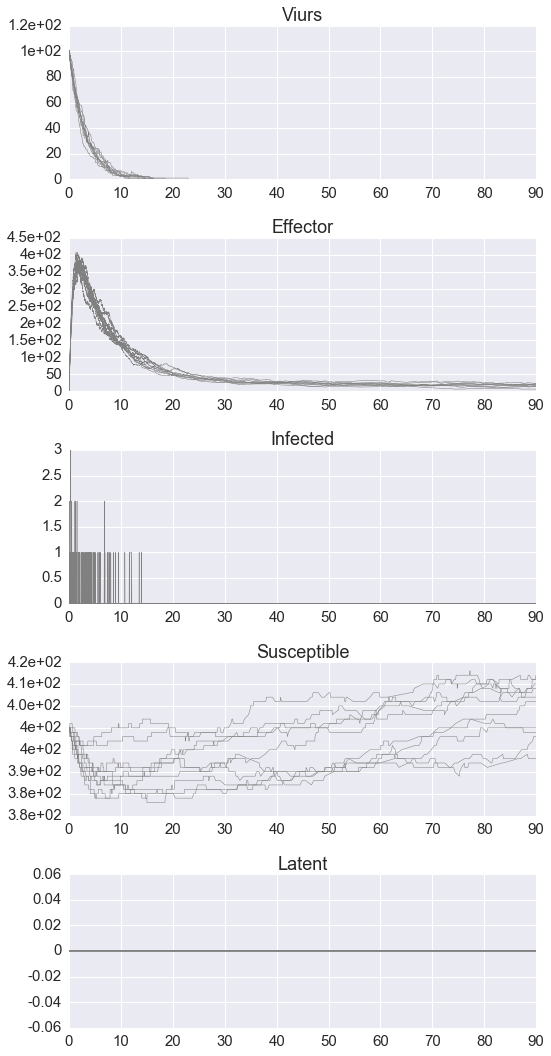

In [9]:
plt.style.use('seaborn-darkgrid')

xss = [vss, ess, iss, sss, lss]
variables = ['Viurs', 'Effector', 'Infected', 'Susceptible', 'Latent']

fig, axes = plt.subplots(5, 1, figsize=(8, 15))
for i, (ax, xs, var) in enumerate(zip(axes, xss, variables)):
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
    for k in range(n_traj):
        ax.plot(tss[k], xs[k], '-', linewidth=0.5, color='grey', alpha=1) 
    ax.set_title(var)
plt.tight_layout()